In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras

In [4]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras.preprocessing import image
from keras import backend as K

In [5]:
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
iv3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [29]:
x = image.img_to_array(image.load_img('data/hacked.png', target_size=(299,299)))
x = ((x/255)-0.5) * 2

x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])
y = iv3.predict(x)

decode_predictions(y)

[[('n07749582', 'lemon', 0.9856129),
  ('n07747607', 'orange', 0.0027745024),
  ('n03938244', 'pillow', 0.0015102219),
  ('n07742313', 'Granny_Smith', 0.0013474352),
  ('n07718472', 'cucumber', 0.001269928)]]

In [24]:
input_layer = iv3.layers[0].input
output_layer = iv3.layers[-1].output

# Lemon
target_class = 951

loss = output_layer[0, target_class]
grad = K.gradients(loss, input_layer)[0]
optimize_gradient = K.function([input_layer, K.learning_phase()], [grad, loss])

adv = np.copy(x)
pert = 0.01

max_pert = x + pert
min_pert = x - pert

cost = 0.0

while(cost < 0.95):
    gr, cost = optimize_gradient([adv, 0])
    adv += gr
    
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    
    print('Lemon Cost: ', cost)

Lemon Cost:  7.020084e-05
Lemon Cost:  7.027922e-05
Lemon Cost:  7.0425835e-05
Lemon Cost:  7.067392e-05
Lemon Cost:  7.0951166e-05
Lemon Cost:  7.124897e-05
Lemon Cost:  7.1560884e-05
Lemon Cost:  7.187404e-05
Lemon Cost:  7.219857e-05
Lemon Cost:  7.252336e-05
Lemon Cost:  7.283874e-05
Lemon Cost:  7.3151794e-05
Lemon Cost:  7.3464464e-05
Lemon Cost:  7.3780146e-05
Lemon Cost:  7.409135e-05
Lemon Cost:  7.4402094e-05
Lemon Cost:  7.4716365e-05
Lemon Cost:  7.5040516e-05
Lemon Cost:  7.5362004e-05
Lemon Cost:  7.568802e-05
Lemon Cost:  7.601252e-05
Lemon Cost:  7.6333155e-05
Lemon Cost:  7.665671e-05
Lemon Cost:  7.6981654e-05
Lemon Cost:  7.7303055e-05
Lemon Cost:  7.761719e-05
Lemon Cost:  7.793601e-05
Lemon Cost:  7.825373e-05
Lemon Cost:  7.8568046e-05
Lemon Cost:  7.888589e-05
Lemon Cost:  7.9207945e-05
Lemon Cost:  7.9528465e-05
Lemon Cost:  7.984638e-05
Lemon Cost:  8.016575e-05
Lemon Cost:  8.048587e-05
Lemon Cost:  8.081057e-05
Lemon Cost:  8.1134545e-05
Lemon Cost:  8.146297

Lemon Cost:  0.00021460556
Lemon Cost:  0.00021543591
Lemon Cost:  0.00021628223
Lemon Cost:  0.00021712958
Lemon Cost:  0.00021796465
Lemon Cost:  0.00021877549
Lemon Cost:  0.00021964427
Lemon Cost:  0.00022048493
Lemon Cost:  0.00022127586
Lemon Cost:  0.00022214284
Lemon Cost:  0.00022298566
Lemon Cost:  0.0002238283
Lemon Cost:  0.00022468176
Lemon Cost:  0.00022552029
Lemon Cost:  0.00022640389
Lemon Cost:  0.00022724798
Lemon Cost:  0.00022808058
Lemon Cost:  0.00022896181
Lemon Cost:  0.00022983273
Lemon Cost:  0.00023067184
Lemon Cost:  0.00023154981
Lemon Cost:  0.00023242345
Lemon Cost:  0.00023327427
Lemon Cost:  0.00023417512
Lemon Cost:  0.00023504792
Lemon Cost:  0.00023593647
Lemon Cost:  0.00023685132
Lemon Cost:  0.00023776581
Lemon Cost:  0.00023871622
Lemon Cost:  0.00023968126
Lemon Cost:  0.00024063248
Lemon Cost:  0.00024159487
Lemon Cost:  0.00024257373
Lemon Cost:  0.00024355631
Lemon Cost:  0.00024453027
Lemon Cost:  0.00024549477
Lemon Cost:  0.00024649044
Le

Lemon Cost:  0.0070947655
Lemon Cost:  0.009849883
Lemon Cost:  0.0073220944
Lemon Cost:  0.0103866
Lemon Cost:  0.007244268
Lemon Cost:  0.011303789
Lemon Cost:  0.0054765316
Lemon Cost:  0.013561961
Lemon Cost:  0.010649166
Lemon Cost:  0.013379339
Lemon Cost:  0.014292303
Lemon Cost:  0.007173396
Lemon Cost:  0.016774787
Lemon Cost:  0.012102846
Lemon Cost:  0.011445008
Lemon Cost:  0.020689119
Lemon Cost:  0.007608746
Lemon Cost:  0.027530283
Lemon Cost:  0.0076258355
Lemon Cost:  0.022685777
Lemon Cost:  0.0140609555
Lemon Cost:  0.021298664
Lemon Cost:  0.01688082
Lemon Cost:  0.036241505
Lemon Cost:  0.009781276
Lemon Cost:  0.03406284
Lemon Cost:  0.017516702
Lemon Cost:  0.027762257
Lemon Cost:  0.022385586
Lemon Cost:  0.036839094
Lemon Cost:  0.017888479
Lemon Cost:  0.028815236
Lemon Cost:  0.028586568
Lemon Cost:  0.033236645
Lemon Cost:  0.014128942
Lemon Cost:  0.044201743
Lemon Cost:  0.03772035
Lemon Cost:  0.061421927
Lemon Cost:  0.01800108
Lemon Cost:  0.07415371
Le

In [25]:
adv = ((adv/2) + 0.5) * 255

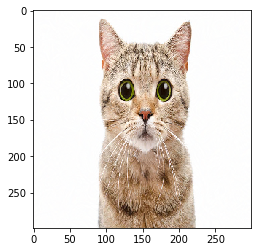

In [26]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [27]:
from PIL import Image

img = Image.fromarray(adv[0].astype(np.uint8))
img.save('data/hacked.png')